In [3]:
#Use this article to export data from gmail and load it in
#https://jellis18.github.io/post/2018-01-17-mail-analysis/

In [4]:
#You can download your gmail data here:
#https://takeout.google.com/settings/takeout

In [5]:
%matplotlib inline

import mailbox
import os
import csv
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
os.getcwd()

"C:\\Users\\Divya Parmar's PC\\Documents\\Gmail-Export"

In [7]:
mbox_file = "C:\\Users\\Divya Parmar's PC\\Documents\\takeout-20190726T213855Z-001\\Takeout\\Mail\\Tracking-Master-PMO-Tracking.mbox"

In [8]:
mbox = mailbox.mbox(mbox_file)

In [9]:
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Return-Path',
 'Received',
 'From',
 'Content-Type',
 'Content-Transfer-Encoding',
 'Mime-Version',
 'Date',
 'Subject',
 'Message-Id',
 'To',
 'X-Mailer']

In [10]:
with open("mbox.csv", "w") as outfile:
    writer = csv.writer(outfile)
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['date'], message['to'],
                         message['X-Gmail-Labels'], message['X-GM-THRID']])
        

In [11]:
df = pd.read_csv('mbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [12]:
df.head()

,subject,from,date,to,label,thread
0,PMO,Divya Parmar <parmar.d@gmail.com>,2019-01-27 09:37:22+00:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1623805754805421128
1,PMO,Divya Parmar <parmar.d@gmail.com>,2018-09-12 14:50:34+00:00,Divya Parmar <parmar.d@gmail.com>,"Archived,Sent,Important,Tracking Master/PMO Tr...",1611413675421364705
2,PMO,Divya Parmar <parmar.d@gmail.com>,2019-05-23 23:10:16+00:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1634366146047306146
3,PMO,Divya Parmar <parmar.d@gmail.com>,2018-12-24 22:26:56+00:00,Divya Parmar <parmar.d@gmail.com>,"Archived,Sent,Important,Tracking Master/PMO Tr...",1620773816148388176
4,PMO,Divya Parmar <parmar.d@gmail.com>,2018-06-02 19:08:10+00:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1602188991677405761


In [13]:
len(df)

550

In [14]:
df.dtypes

subject                 object
from                    object
date       datetime64[ns, UTC]
to                      object
label                   object
thread                   int64
dtype: object

In [15]:
#convert timezone from utc to pst/pdt
df['timestamp'] = pd.to_datetime(df['date'], unit='ms').dt.tz_convert('US/Pacific')

In [16]:
#normalize timestamp to a date
df['date'] =  df['timestamp'].dt.normalize()

In [17]:
#get hour of day
df['hour_pst'] = df['timestamp'].apply(lambda x: x.hour)

In [18]:
#create flag for weekend or weekday
df['day_of_week'] = df['timestamp'].apply(lambda x: x.weekday)

In [19]:
#create flag for weekend or weekday
df['weekend_flag'] = df['timestamp'].apply(lambda x: 'weekday' if x.weekday() <= 4 else 'weekend')

In [20]:
# column of who I was working for
#df['company_flag']
#dt.datetime(2016, 3, 30)
#dt.datetime(2017, 9, 30)
#dt.datetime(2018, 6, 15)
#dt.datetime(2018, 8, 27)
#dt.datetime(2019, 5, 1)

#Explore datetime object
dt.datetime(2019, 5, 1)

datetime.datetime(2019, 5, 1, 0, 0)

In [21]:
df.head()

,subject,from,date,to,label,thread,timestamp,hour_pst,day_of_week,weekend_flag
0,PMO,Divya Parmar <parmar.d@gmail.com>,2019-01-27 00:00:00-08:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1623805754805421128,2019-01-27 01:37:22-08:00,1,6,weekend
1,PMO,Divya Parmar <parmar.d@gmail.com>,2018-09-12 00:00:00-07:00,Divya Parmar <parmar.d@gmail.com>,"Archived,Sent,Important,Tracking Master/PMO Tr...",1611413675421364705,2018-09-12 07:50:34-07:00,7,2,weekday
2,PMO,Divya Parmar <parmar.d@gmail.com>,2019-05-23 00:00:00-07:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1634366146047306146,2019-05-23 16:10:16-07:00,16,3,weekday
3,PMO,Divya Parmar <parmar.d@gmail.com>,2018-12-24 00:00:00-08:00,Divya Parmar <parmar.d@gmail.com>,"Archived,Sent,Important,Tracking Master/PMO Tr...",1620773816148388176,2018-12-24 14:26:56-08:00,14,0,weekday
4,PMO,Divya Parmar <parmar.d@gmail.com>,2018-06-02 00:00:00-07:00,parmar.d@gmail.com,"Archived,Sent,Important,Tracking Master/PMO Tr...",1602188991677405761,2018-06-02 12:08:10-07:00,12,5,weekend


In [22]:
df.dtypes

subject                             object
from                                object
date            datetime64[ns, US/Pacific]
to                                  object
label                               object
thread                               int64
timestamp       datetime64[ns, US/Pacific]
hour_pst                             int64
day_of_week                          int64
weekend_flag                        object
dtype: object

In [23]:
df_anki_weekday = df[(df['timestamp'] >= dt.datetime(2018, 8, 27)) & (df['timestamp'] <= dt.datetime(2019, 5, 1))& (df['weekend_flag'] == 'weekday')]
df_anki_weekend = df[(df['timestamp'] >= dt.datetime(2018, 8, 27)) & (df['timestamp'] <= dt.datetime(2019, 5, 1))& (df['weekend_flag'] == 'weekend')]
df_anki_all = df[(df['timestamp'] >= dt.datetime(2018, 8, 27)) & (df['timestamp'] <= dt.datetime(2019, 5, 1))]

In [24]:
df_weekend = df[(df['weekend_flag'] == 'weekend')]
df_weekday = df[(df['weekend_flag'] == 'weekday')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C87CB70>]], dtype=object)

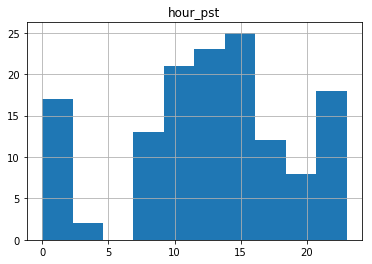

In [25]:
#histogram of pmo by time of day PST
df_weekend.hist(column='hour_pst')

In [26]:
df_pivoted = df_anki_all.pivot_table(values='timestamp', index='hour_pst', columns='day_of_week', 
                         aggfunc=pd.Series.nunique)

In [27]:
df_pivoted

day_of_week,0,1,2,3,4,5,6
hour_pst,,,,,,,
0,NaN,1.0,1.0,NaN,NaN,2.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,NaN,3.0,1.0,NaN,1.0,NaN,NaN
8,3.0,5.0,1.0,5.0,6.0,2.0,NaN
9,NaN,4.0,1.0,NaN,2.0,2.0,NaN
10,NaN,NaN,NaN,2.0,NaN,1.0,2.0
11,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12,NaN,NaN,NaN,NaN,1.0,NaN,1.0
13,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [28]:
df_pivoted.sum()

day_of_week
0     6.0
1    18.0
2     7.0
3     9.0
4    10.0
5    10.0
6    11.0
dtype: float64

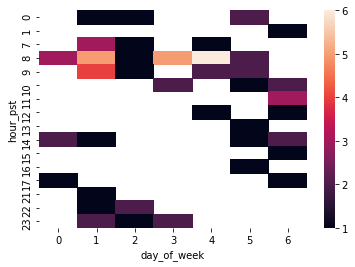

In [29]:
#seaborn heatmap of pmo by hour of day and day of week when employed
sns.heatmap(df_pivoted)

In [30]:
df_kix_all = df[(df['timestamp'] >= dt.datetime(2016, 3, 30)) & (df['timestamp'] <= dt.datetime(2017, 9, 29))]
df_pivoted_kix = df_kix_all.pivot_table(values='timestamp', index='hour_pst', columns='day_of_week', 
                         aggfunc=pd.Series.nunique)
df_pivoted_kix

day_of_week,0,1,2,3,4,5,6
hour_pst,,,,,,,
0,1.0,2.0,3.0,5.0,3.0,2.0,1.0
1,NaN,1.0,3.0,NaN,3.0,2.0,3.0
2,NaN,NaN,1.0,1.0,NaN,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,1.0
7,1.0,2.0,1.0,2.0,1.0,1.0,NaN
8,2.0,15.0,13.0,11.0,6.0,1.0,NaN
9,NaN,1.0,3.0,3.0,NaN,1.0,1.0
10,NaN,1.0,NaN,3.0,NaN,1.0,2.0
11,NaN,NaN,1.0,NaN,NaN,3.0,2.0


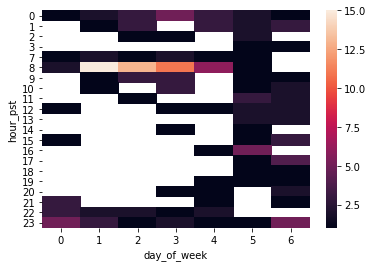

In [31]:
sns.heatmap(df_pivoted_kix)